# A brief investigation into the reasons behind random wiring performance benefits/deficits
Corresponds to Section 6c of the manuscript

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/USC Random NN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

img_path = './drive/My Drive/Colab Notebooks/USC Random NN/images/'

In [ ]:
experiments_loc = './drive/My Drive/Colab Notebooks/USC Random NN/experimental_results/weight_freezing/'

# Load raw weight freezing experiment results
cnn_rand_dense_1M = np.load(f'{experiments_loc}cnn_rand_dense/rmse_rand_model_1M.npy')
cnn_rand_dense_10M = np.load(f'{experiments_loc}cnn_rand_dense/rmse_rand_model_10M.npy')
cnn_rand_dense_1M_frozen = np.load(f'{experiments_loc}cnn_rand_dense/rmse_frozen_model_1M.npy')
cnn_rand_dense_10M_frozen = np.load(f'{experiments_loc}cnn_rand_dense/rmse_frozen_model_10M.npy')

cnn_lstm_rand_dense_1M = np.load(f'{experiments_loc}cnn_lstm_rand_dense/rmse_rand_model_1M.npy')
cnn_lstm_rand_dense_10M = np.load(f'{experiments_loc}cnn_lstm_rand_dense/rmse_rand_model_10M.npy')
cnn_lstm_rand_dense_1M_frozen = np.load(f'{experiments_loc}cnn_lstm_rand_dense/rmse_frozen_model_1M.npy')
cnn_lstm_rand_dense_10M_frozen = np.load(f'{experiments_loc}cnn_lstm_rand_dense/rmse_frozen_model_10M.npy')

In [ ]:
num_layers = [2,6,10]
vars_to_predict = ['tas', 'diurnal_temperature_range', 'pr', 'pr90']

def find_significant_diffs(rand, frozen):
  for i in range(len(num_layers)):
    for j in range(len(vars_to_predict)):
      p_val = stats.ttest_ind(rand[i,j], frozen[i,j])[1]
      if p_val < 0.05:
        print(f'{num_layers[i]} Layers, {vars_to_predict[j]}')
        if np.mean(rand[i,j]) <= np.mean(frozen[i,j]):
          print(f'\tRand better')
        else:
          print(f'\tFrozen better') 

In [ ]:
find_significant_diffs(cnn_rand_dense_1M, cnn_rand_dense_1M_frozen)

2 Layers, tas
	Rand better
2 Layers, pr
	Rand better
6 Layers, diurnal_temperature_range
	Rand better
6 Layers, pr
	Frozen better
10 Layers, tas
	Rand better
10 Layers, pr
	Frozen better
10 Layers, pr90
	Frozen better


In [ ]:
find_significant_diffs(cnn_rand_dense_10M, cnn_rand_dense_10M_frozen)

2 Layers, tas
	Rand better
2 Layers, diurnal_temperature_range
	Rand better
2 Layers, pr
	Rand better
6 Layers, diurnal_temperature_range
	Rand better
6 Layers, pr
	Rand better
10 Layers, tas
	Frozen better
10 Layers, diurnal_temperature_range
	Rand better
10 Layers, pr
	Rand better


In [ ]:
find_significant_diffs(cnn_lstm_rand_dense_1M, cnn_lstm_rand_dense_1M_frozen)

10 Layers, pr90
	Frozen better


In [ ]:
find_significant_diffs(cnn_lstm_rand_dense_10M, cnn_lstm_rand_dense_10M_frozen)

2 Layers, pr
	Frozen better
6 Layers, pr
	Rand better


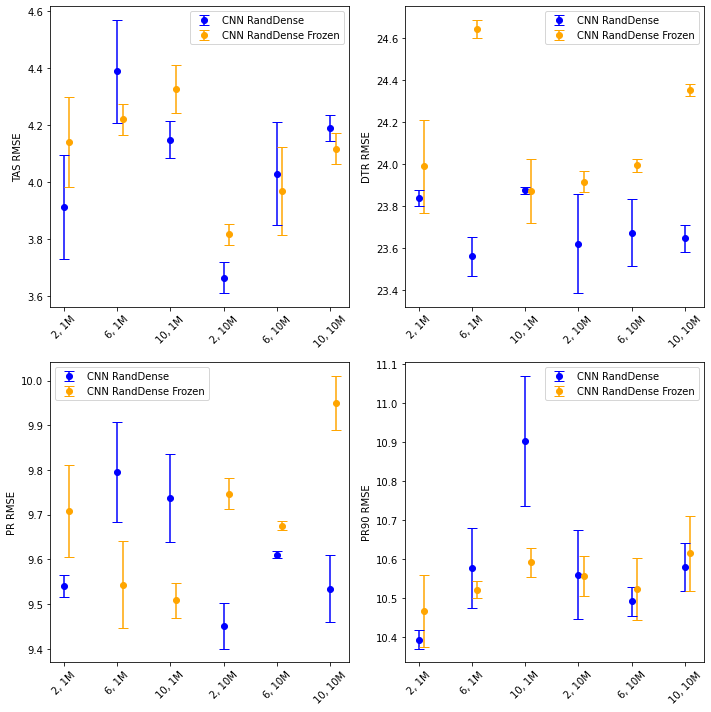

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
var_labels = ['TAS', 'DTR', 'PR', 'PR90']
x_labels = ['', '2, 1M', '6, 1M', '10, 1M', '2, 10M', '6, 10M', '10, 10M']

for var_idx in range(len(vars_to_predict)):
  rand_rmses = []
  for rmses in [cnn_rand_dense_1M, cnn_rand_dense_10M]:
    for i in range(3):
      rand_rmses.append(rmses[i,var_idx])

  rand_means = []
  rand_cis = []
  for rmse_list in rand_rmses:
    rand_means.append(np.mean(rmse_list))
    ci = stats.t.interval(alpha=0.95, df=len(rmse_list)-1, loc=np.mean(rmse_list), scale=stats.sem(rmse_list))
    rand_cis.append((ci[1]-ci[0])/2)

  frozen_rmses = []
  for rmses in [cnn_rand_dense_1M_frozen, cnn_rand_dense_10M_frozen]:
    for i in range(3):
      frozen_rmses.append(rmses[i,var_idx])

  frozen_means = []
  frozen_cis = []
  for rmse_list in frozen_rmses:
    frozen_means.append(np.mean(rmse_list))
    ci = stats.t.interval(alpha=0.95, df=len(rmse_list)-1, loc=np.mean(rmse_list), scale=stats.sem(rmse_list))
    frozen_cis.append((ci[1]-ci[0])/2)

  ax = axes[var_idx//2, var_idx%2]
  ax.errorbar(x=np.arange(0,6,1), y=rand_means, yerr=rand_cis, label='CNN RandDense', color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(0.1,6.1,1), y=frozen_means, yerr=frozen_cis, label='CNN RandDense Frozen', color='orange', marker='o', capsize=5, ls='none')
  ax.set_xticklabels(x_labels, rotation=45, ha="center")
  ax.set_ylabel(var_labels[var_idx]+' RMSE')
  ax.legend()

fig.tight_layout()
fig.savefig(img_path+'cnn_weight_freezing.pdf')

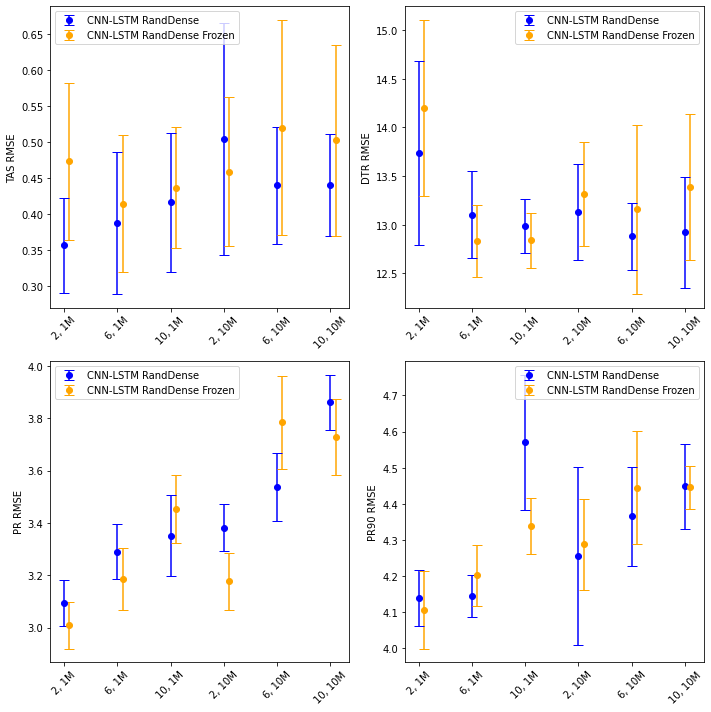

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
var_labels = ['TAS', 'DTR', 'PR', 'PR90']
x_labels = ['', '2, 1M', '6, 1M', '10, 1M', '2, 10M', '6, 10M', '10, 10M']

for var_idx in range(len(vars_to_predict)):
  rand_rmses = []
  for rmses in [cnn_lstm_rand_dense_1M, cnn_lstm_rand_dense_10M]:
    for i in range(3):
      rand_rmses.append(rmses[i,var_idx])

  rand_means = []
  rand_cis = []
  for rmse_list in rand_rmses:
    rand_means.append(np.mean(rmse_list))
    ci = stats.t.interval(alpha=0.95, df=len(rmse_list)-1, loc=np.mean(rmse_list), scale=stats.sem(rmse_list))
    rand_cis.append((ci[1]-ci[0])/2)

  frozen_rmses = []
  for rmses in [cnn_lstm_rand_dense_1M_frozen, cnn_lstm_rand_dense_10M_frozen]:
    for i in range(3):
      frozen_rmses.append(rmses[i,var_idx])

  frozen_means = []
  frozen_cis = []
  for rmse_list in frozen_rmses:
    frozen_means.append(np.mean(rmse_list))
    ci = stats.t.interval(alpha=0.95, df=len(rmse_list)-1, loc=np.mean(rmse_list), scale=stats.sem(rmse_list))
    frozen_cis.append((ci[1]-ci[0])/2)

  ax = axes[var_idx//2, var_idx%2]
  ax.errorbar(x=np.arange(0,6,1), y=rand_means, yerr=rand_cis, label='CNN-LSTM RandDense', color='blue', marker='o', capsize=5, ls='none')
  ax.errorbar(x=np.arange(0.1,6.1,1), y=frozen_means, yerr=frozen_cis, label='CNN-LSTM RandDense Frozen', color='orange', marker='o', capsize=5, ls='none')
  ax.set_xticklabels(x_labels, rotation=45, ha="center")
  ax.set_ylabel(var_labels[var_idx]+' RMSE')
  ax.legend()

fig.tight_layout()
fig.savefig(img_path+'cnn_lstm_weight_freezing.pdf')